<a href="https://colab.research.google.com/github/anushkagup208/ml-projects/blob/main/Travel_Itinery_Planner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain_core langchain_groq langchain_community langchain langgraph



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 17.2 MB/s eta 0:00:00


In [2]:
import os
from typing import TypedDict,Annotated,List
from langgraph.graph import StateGraph,END
from langchain_core.messages import HumanMessage,AIMessage
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

In [3]:
class PlannerState(TypedDict):
  messages : Annotated[List[HumanMessage | AIMessage],"the message is in the conversation"]
  city : str
  intersets : List[str]
  itinery : str

In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(
    temperature=0,
    groq_api_key="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",
    model_name="meta-llama/llama-4-scout-17b-16e-instruct"
)


In [5]:
itinery_prompt =ChatPromptTemplate.from_messages([
    ("system","you are a helpul travel assistant.Create a day itenary for {city} based on the users {intersets} .provide a brief,bulleted itinery"),
    ("human","Create a itinery for my day trip" )])

Define agent Function

In [6]:
def input_city(state:PlannerState) -> PlannerState:
  print("please enter the city you want to visit")
  user_message= input("your input:")
  return{
      **state,
      "city":user_message,
      "messages": state["messages"]+[HumanMessage(content=user_message)]

  }
def input_intersets(state:PlannerState) -> PlannerState:
  print(f"please enter the interest for your trip to : {state['city']} (comma-seperated: ) ")
  user_message= input("your input:")
  return{
      **state,
      "intersets":[intersets.strip() for intersets in user_message.split  (" ,")],
      "messages": state["messages"]+[HumanMessage(content=user_message)]

  }

def create_itinery(state:PlannerState) -> PlannerState:
  print(f"Create an itinery for {state['city']} based on intersets :{','.join(state['intersets'])}"),
  response=llm.invoke(itinery_prompt.format_messages(city=state["city"],intersets=','.join(state["intersets"])))
  print("Final Itinery:")
  print(response.content)
  return{
      **state,
      "messages" : state["messages"]+[AIMessage(content=response.content)],
      "itinery" : response.content,

  }



In [7]:
workflow= StateGraph(PlannerState)

workflow.add_node(input_city,"input_city")
workflow.add_node(input_intersets,"input_intersets")
workflow.add_node(create_itinery,"create_itinery")

workflow.set_entry_point("input_city")

workflow.add_edge("input_city","input_intersets")
workflow.add_edge("input_intersets","create_itinery")
workflow.add_edge("create_itinery",END)

app=workflow.compile()

Graph structure

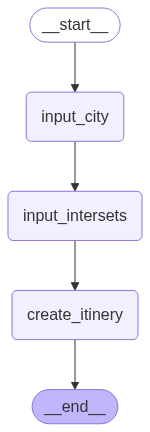

In [8]:
display(
    Image(
        app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)
    )
)

In [9]:
def travel_planner(user_request: str):
  print(f"Initial request: {user_request}")
  state={
      "messages":[HumanMessage(content=user_request)],
      "city" : "",
      "intersets": [],
      "itinery": "",
  }
  for output in app.stream(state):
    pass

In [10]:
user_request="I want to plan a day trip"
travel_planner(user_request)

Initial request: I want to plan a day trip
please enter the city you want to visit


KeyboardInterrupt: Interrupted by user